In [3]:
import duckdb

"""
You are working with a database stored in parquet files. Each dataclass below represents a table. Each table lives in a parquet file. The data lives inside parquet files. All reference to tables must be replaced with 'parquet_file_name.parquet' (e.g. users.parquet). The data is in the same directory as this file.

# users.parquet
@dataclass(frozen=True)
class UserDataClass:
    fid: int
    username: str
    display_name: str
    verified: bool
    pfp_url: str
    farcaster_address: str
    external_address: str
    registered_at: int
    bio_text: str

# f"casts_{dt.year:04d}_{dt.month:02d}.parquet"
# example file name: casts_2021_01.parquet, casts_2021_02.parquet, etc.
@dataclass(frozen=True)
class CastDataClass:
    hash: str
    thread_hash: str
    text: str
    timestamp: int
    author_fid: int
    parent_hash: str = None

To query from multiple files, you can do `SELECT timestamp FROM read_parquet('casts*.parquet')`. You can also use read_parquet(['file1.parquet', 'file2.parquet']).

Your job is to turn user queries (in natural language) to SQL. Only return the SQL and nothing else. Don't explain, don't say "here's your query." Just give the SQL. Say "Yes" if you understand.
"""


'\nYou are working with a database stored in parquet files. Each dataclass below represents a table. Each table lives in a parquet file. The data lives inside parquet files. All reference to tables must be replaced with \'parquet_file_name.parquet\' (e.g. users.parquet). The data is in the same directory as this file.\n\n# users.parquet\n@dataclass(frozen=True)\nclass UserDataClass:\n    fid: int\n    username: str\n    display_name: str\n    verified: bool\n    pfp_url: str\n    farcaster_address: str\n    external_address: str\n    registered_at: int\n    bio_text: str\n\n# f"casts_{dt.year:04d}_{dt.month:02d}.parquet"\n# example file name: casts_2021_01.parquet, casts_2021_02.parquet, etc.\n@dataclass(frozen=True)\nclass CastDataClass:\n    hash: str\n    thread_hash: str\n    text: str\n    timestamp: int\n    author_fid: int\n    parent_hash: str = None\n\nTo query from multiple files, you can do `SELECT timestamp FROM read_parquet(\'casts*.parquet\')`. You can also use read_parqu

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import pandas as pd

# "count all casts between 2022/06 to 2022/12" where username = "timdaub"
query = "select * from read_parquet('casts*.parquet') where author_fid = (select fid from read_parquet('users.parquet') where username = 'timdaub');"
df = duckdb.query(query).df()

# Date one month before 2023/02/26
date_before = datetime(2023, 2, 26) - timedelta(days=30)
timestamp_before = int(date_before.timestamp() * 1000.0)
print(timestamp_before)  # Output: 1643270400000

# Date one month after 2023/02/26
date_after = datetime(2023, 2, 26) + timedelta(days=30)
timestamp_after = int(date_after.timestamp() * 1000.0)
print(timestamp_after)   # Output: 1677101400000


# # filter out the df to only include casts between the two dates
# df = df[(df['timestamp'] > timestamp_before) & (df['timestamp'] < timestamp_after)]

# # convert timestamp to datetime
# df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# # groupby 24h
# df = df.groupby(pd.Grouper(key='timestamp', freq='24h')).count()

# # turn into seaborn graph heatmap plot


daily_counts = df.groupby(pd.Grouper(
    key='timestamp', freq='24h')).size().reset_index(name='count')

daily_counts['day_of_week'] = daily_counts['timestamp'].dt.dayofweek
daily_counts['hour'] = daily_counts['timestamp'].dt.hour

heatmap_data = daily_counts.pivot_table(
    values='count', index='day_of_week', columns='hour', aggfunc='sum', fill_value=0)

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
hours = [str(i) for i in range(24)]

plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, cmap='YlGnBu', xticklabels=hours, yticklabels=days)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title("User's Posting Activity Heatmap")
plt.show()


1674752400000
1679936400000


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

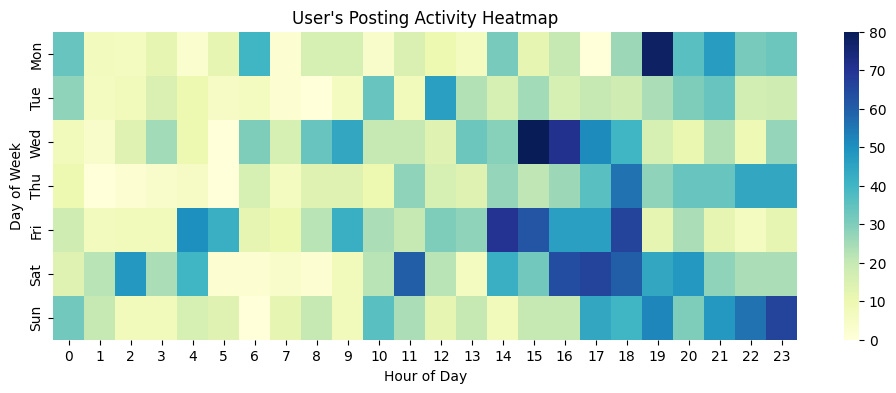

In [34]:
from datetime import datetime, timedelta
import pandas as pd
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt

query = "select * from read_parquet('casts*.parquet') where author_fid = (select fid from read_parquet('users.parquet') where username = 'timdaub');"
df = duckdb.query(query).df()

date_before = datetime(2023, 2, 26) - timedelta(days=30)
timestamp_before = int(date_before.timestamp() * 1000.0)

date_after = datetime(2023, 2, 26) + timedelta(days=30)
timestamp_after = int(date_after.timestamp() * 1000.0)

df = df[(df['timestamp'] > timestamp_before) & (df['timestamp'] < timestamp_after)]
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

daily_counts = df.groupby(pd.Grouper(key='timestamp', freq='1h')).size().reset_index(name='count')

daily_counts['day_of_week'] = daily_counts['timestamp'].dt.dayofweek
daily_counts['hour'] = daily_counts['timestamp'].dt.hour

heatmap_data = daily_counts.pivot_table(values='count', index='day_of_week', columns='hour', aggfunc='sum', fill_value=0)

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
hours = [str(i) for i in range(24)]

plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, cmap='YlGnBu', xticklabels=hours, yticklabels=days)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title("User's Posting Activity Heatmap")
plt.show()


/tmp/ipykernel_7201/4253489624.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['timestamp'] = pd.to_datetime(
/tmp/ipykernel_7201/4253489624.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['timestamp'] = pd.to_datetime(


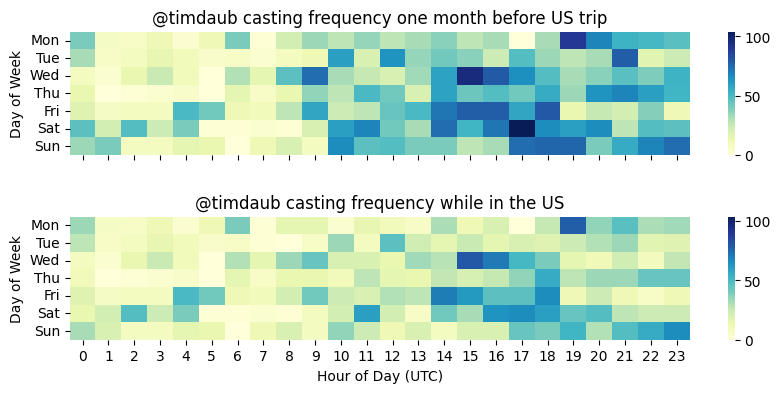

In [76]:
from datetime import datetime, timedelta
import pandas as pd
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt

query = "select * from read_parquet('casts*.parquet') where author_fid = (select fid from read_parquet('users.parquet') where username = 'timdaub');"
df = duckdb.query(query).df()


def create_heatmap_data(df, start_date, end_date):
    date_before = start_date - timedelta(days=30)
    date_after = end_date + timedelta(days=30)

    timestamp_before = int(date_before.timestamp() * 1000.0)
    timestamp_after = int(date_after.timestamp() * 1000.0)

    df_filtered = df[(df['timestamp'] > timestamp_before) &
                     (df['timestamp'] < timestamp_after)]
    df_filtered['timestamp'] = pd.to_datetime(
        df_filtered['timestamp'], unit='ms')

    daily_counts = df_filtered.groupby(pd.Grouper(
        key='timestamp', freq='1h')).size().reset_index(name='count')

    daily_counts['day_of_week'] = daily_counts['timestamp'].dt.dayofweek
    daily_counts['hour'] = daily_counts['timestamp'].dt.hour

    heatmap_data = daily_counts.pivot_table(
        values='count', index='day_of_week', columns='hour', aggfunc='sum', fill_value=0)
    return heatmap_data


start_date1 = datetime(2023, 1, 26)
end_date1 = datetime(2023, 2, 26)

start_date2 = datetime(2023, 2, 26)
end_date2 = datetime(2023, 3, 26)

heatmap_data1 = create_heatmap_data(df, start_date1, end_date1)
heatmap_data2 = create_heatmap_data(df, start_date2, end_date2)

# sum total number of casts of both heatmaps
total_casts = heatmap_data1.sum().sum()

vmax = max(heatmap_data1.max().max(), heatmap_data2.max().max())

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

sns.heatmap(heatmap_data1, cmap='YlGnBu', xticklabels=hours,
            yticklabels=days, ax=ax1, vmin=0, vmax=vmax)
ax1.set_title('@timdaub casting frequency one month before US trip')
ax1.set_xlabel('')
ax1.set_ylabel('Day of Week')

sns.heatmap(heatmap_data2, cmap='YlGnBu', xticklabels=hours,
            yticklabels=days, ax=ax2, vmin=0, vmax=vmax)
ax2.set_title('@timdaub casting frequency while in the US')
ax2.set_xlabel('Hour of Day (UTC)')
ax2.set_ylabel('Day of Week')

plt.subplots_adjust(hspace=0.5)

plt.show()


In [16]:
# get casts from datasets/casts_2023_03.parquet
# dump to dataframe

from datetime import datetime, timedelta
import pandas as pd
import duckdb

query = "select * from read_parquet('./datasets/casts_2023_03.parquet')"
df = duckdb.query(query).df()

# get casts in the last 24h
casts = df[df['timestamp'] > int((datetime.now() - timedelta(days=1)).timestamp() * 1000.0)]
print(len(casts))

# from casts, fids that appear the most often, then get their usernames
# and print them

frequent_fids = casts['author_fid'].value_counts().index.tolist()
print(frequent_fids)

# make a df where column is fid, username, and cast count, sorted by cast count

df = pd.DataFrame(columns=['fid', 'username', 'cast_count'])
for fid in frequent_fids:
    username = duckdb.query("select username from read_parquet('./datasets/users.parquet') where fid = " + str(fid)).df()['username'][0]
    cast_count = len(casts[casts['author_fid'] == fid])
    df = df.append({'fid': fid, 'username': username, 'cast_count': cast_count}, ignore_index=True)

df = df.sort_values(by=['cast_count'], ascending=False)
print(df)

56562
[8928, 2157, 2904, 6806, 528, 533, 4163, 5708, 5604, 474, 3432, 1890, 1355, 1996, 1325, 75, 8304, 3872, 880, 472, 3, 5494, 602, 617, 451, 2, 10605, 194, 7706, 10570, 1137, 2345, 1606, 6731, 2588, 5620, 9664, 1287, 4853, 6506, 10660, 11009, 4251, 576, 1795, 10512, 5774, 5612, 1887, 1356, 431, 5952, 2455, 347, 2883, 312, 7130, 11213, 1048, 10348, 8329, 11022, 616, 6804, 10520, 129, 10351, 11215, 1285, 5991, 3115, 4286, 11128, 5832, 5243, 124, 6376, 359, 1296, 3365, 8587, 1471, 4583, 5701, 7556, 7637, 2091, 4409, 473, 4801, 847, 10920, 5172, 11109, 1886, 4606, 626, 8004, 1484, 8961, 1236, 436, 2042, 4134, 4373, 9135, 276, 3584, 10852, 2115, 7061, 10757, 5964, 1098, 143, 4565, 1776, 8728, 3329, 11099, 325, 5267, 9548, 3708, 169, 1657, 7438, 4214, 8289, 7479, 11230, 1970, 378, 11036, 2113, 6631, 3636, 4434, 6187, 373, 5126, 99, 1813, 10234, 135, 3435, 988, 457, 1145, 66, 5545, 7996, 4904, 290, 10604, 5758, 762, 30, 8636, 8573, 1214, 2494, 1171, 60, 11205, 4327, 1020, 358, 4731, 7009, 

KeyError: 0